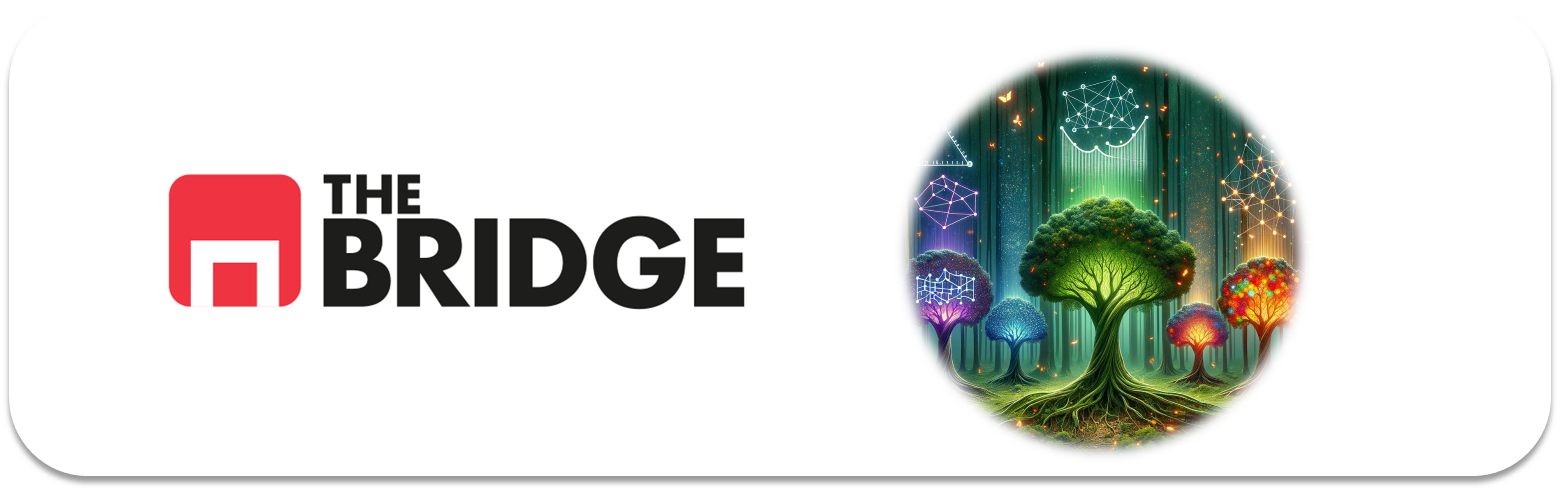

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, bubble_plot


In [2]:
import importlib
import bootcampviztools
importlib.reload(bootcampviztools)

<module 'bootcampviztools' from 'c:\\Users\\jose\\Documents\\bootcamp\\DS_Online_Octubre24_Exercises\\04_Machine_Learning\\Sprint_11\\Unidad_01\\Practica_Obligatoria\\bootcampviztools.py'>

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

**SOLUCION**

Problema de negocio: Tenemos que ser capaces de reponderle al banco con cierta precision cuando nos pregunte si un cliente podría aceptar o no una oferta del departamento de marketing dado ciertas datos o características relacionadas con el cliente. Debemos ser capaces de predecir con SI o NO la decision del cliente dado sus características.

Problema tecnico: Estamos ante un problema de clasificación que nos exige predecir una variable objetivo binaria. El problema planteado es de tipo supervisado ya que la variable objetivo viene con etiquetas de las cuales el modelo puede aprender para predecir.  
Para esta clasificacion podríamos usar modelos logisticos de regresión y arboles de decisión.

Cargamos el archivo csv en un dataframe usando pandas y echamos un vistazo a los datos. Además vemos la información general del dataset.

In [3]:
df_mark = pd.read_csv("./data/bank-full.csv", delimiter=";")
df_mark.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


*Vemos que no hay nulos en el dataset.*

Hacemos una primera clasificacion de los tipos de variables (categorias y numericas). Luego veremos si es correcta.

In [5]:
features_num = df_mark.describe().columns.to_list()
features_cat = [col for col in df_mark.columns if col not in features_num]
print("Numericas:", features_num)
print("Categoricas:", features_cat)

Numericas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categoricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


Lo vemos en una tabla

In [6]:
columnas = df_mark.columns
tipos = ["numerica" if col in features_num else "categorica" for col in columnas]
df_tipos = pd.DataFrame({'Tipo': tipos}, index=columnas)
#df_tipos = pd.DataFrame({'Tipo de Variable': tipos, 'variable': columnas})

df_tipos

,Tipo
age,numerica
job,categorica
marital,categorica
education,categorica
default,categorica
balance,numerica
housing,categorica
loan,categorica
contact,categorica
day,numerica


Nuestra tabla de tipos de variables concuerda con la tabla de descripcion de variables proporcionada en el enunciado.

Ahora tipificamos las variables en base a su cardinalidad (en binarias, categoricas, numericas discretas o numericas continuas).

In [7]:
def card_tipo(df,umbral_categoria = 13, umbral_continua = 3):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp



Ponemos el umbral de categoricas a 13 y el umbral de numericas continuas a 3%

In [8]:
card_tipo(df_mark)

,Card,%_Card,Tipo,tipo_sugerido
age,77,0.170313,int64,Numerica discreta
job,12,0.026542,object,Categorica
marital,3,0.006636,object,Categorica
education,4,0.008847,object,Categorica
default,2,0.004424,object,Binaria
balance,7168,15.854549,int64,Numerica continua
housing,2,0.004424,object,Binaria
loan,2,0.004424,object,Binaria
contact,3,0.006636,object,Categorica
day,31,0.068567,int64,Numerica discreta


Vemos que la tipificacion de la tabla concuerda con nuestra tabla preliminar y con la descripcion de variables del enunciado.

Sin ambargo se debe convertir pdays a categorica porque tiene un -1 que indica que el cliente nunca ha sido contactado.

In [9]:
df_mark.loc[df_mark.pdays != -1, "pdays"] = 1 # Si ha sido contactado previamente
df_mark.loc[df_mark.pdays == -1, "pdays"] = 0 # Si nunca ha sido contactado

In [10]:
features_cat = features_cat + ["pdays"]

In [11]:
features_num = [col for col in features_num if col != "pdays"]

Seleccionamos la variable target

In [12]:
target = "y"
print("Target:",target)
features_cat = [col for col in features_cat if col != target]
print(f"Categoricas({len(features_cat)}):{features_cat}")
print(f"Numericas({len(features_num)}): {features_num}")

Target: y
Categoricas(10):['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'pdays']
Numericas(6): ['age', 'balance', 'day', 'duration', 'campaign', 'previous']


Hacemos la division del train y test

Pero antes vemos la distribucion del target para ver si tenemos que estratificar por esa variable.

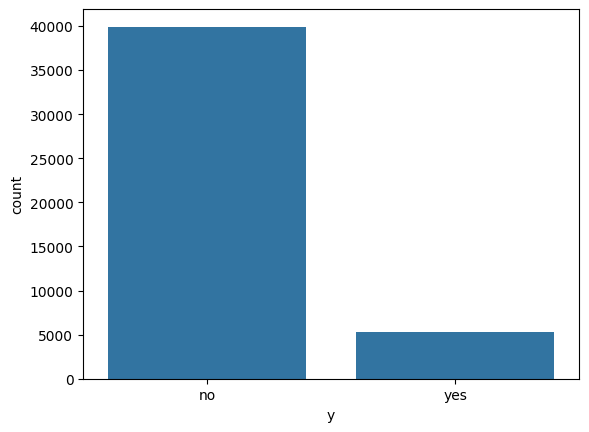

In [13]:
sns.countplot(x = target, data = df_mark);

In [14]:
df_mark[target].value_counts(True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Podemo ver que la distribucion de la variable categorica objetivo está muy desequilibrada. Esto puede traducirse en una baja sensibilidad del modelo de clasificacion para la clase 1(yes), es decir habrá muchos falsos negativos.  
Pero lo podemos solucionar usando stratify. 

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_mark, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

36168
9043


Hacemos el mini EDA

Ahora hacemos un analisis bivariante de target con las variables numericas.

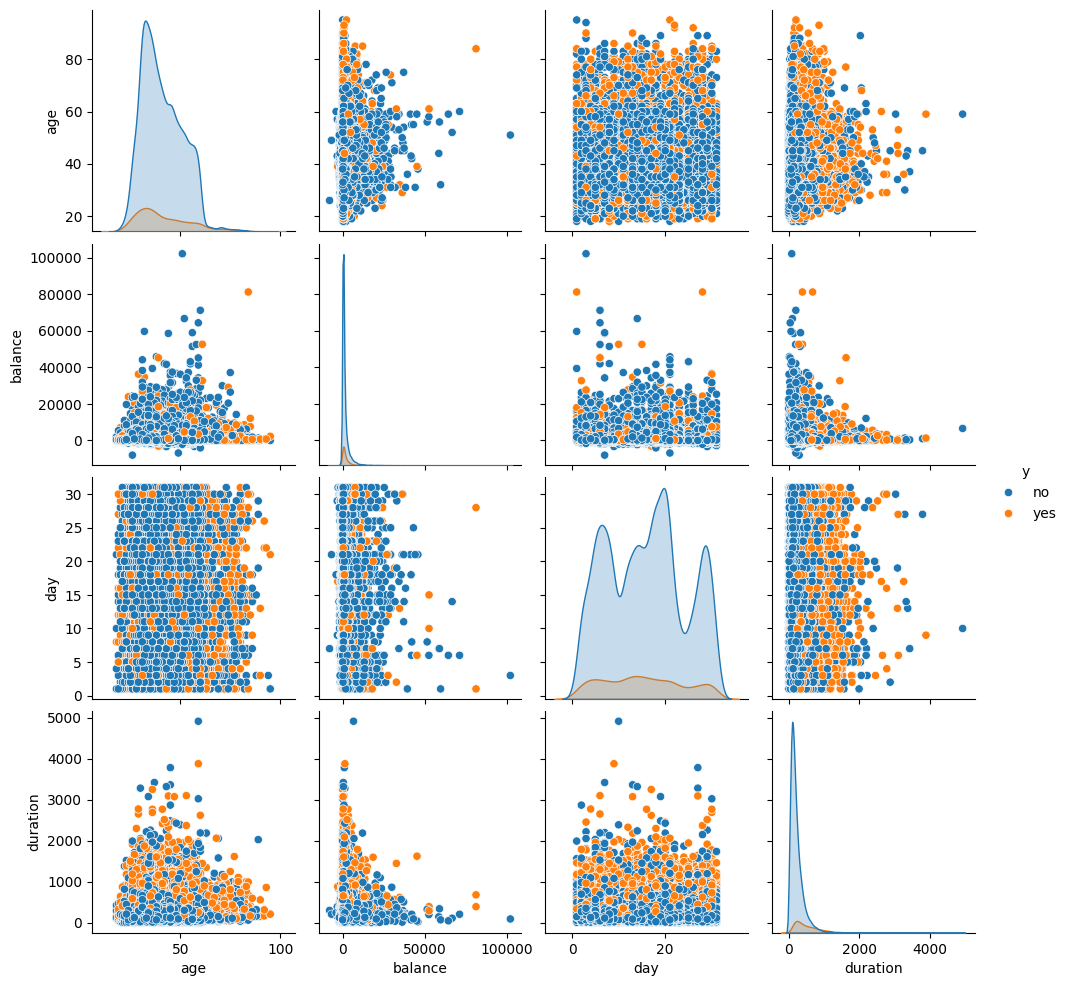

In [16]:
# Visualizamos las primeras 4 variables 
sns.pairplot(train_set[features_num[0:4] + [target]], hue=target);

Hago un zoom en balance para apreciarlo mejor

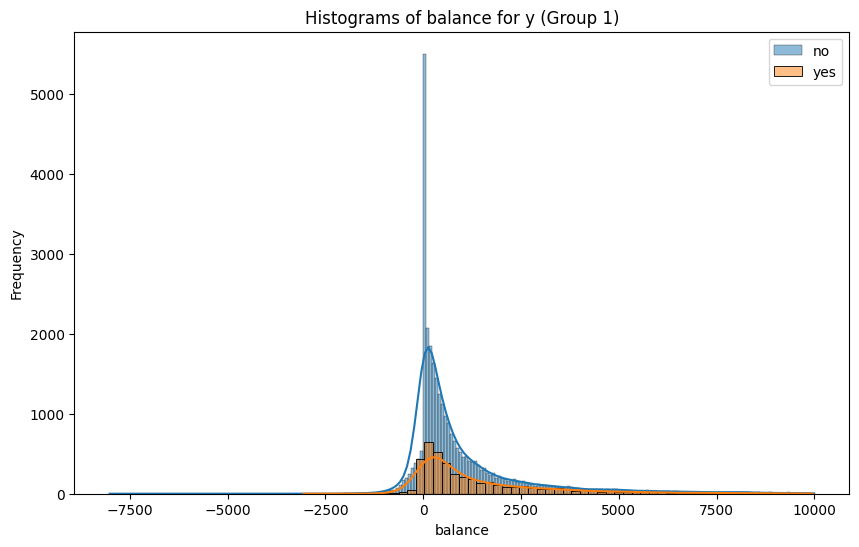

In [17]:
plot_grouped_histograms(train_set[train_set.balance <10000], target,"balance", group_size=2)

Me quedo con balance porque las distribuciones del yes y el no son ligeramente diferentes.

Hacemos un zoom en duration para ver mejor la distribucion del yes y el no. 

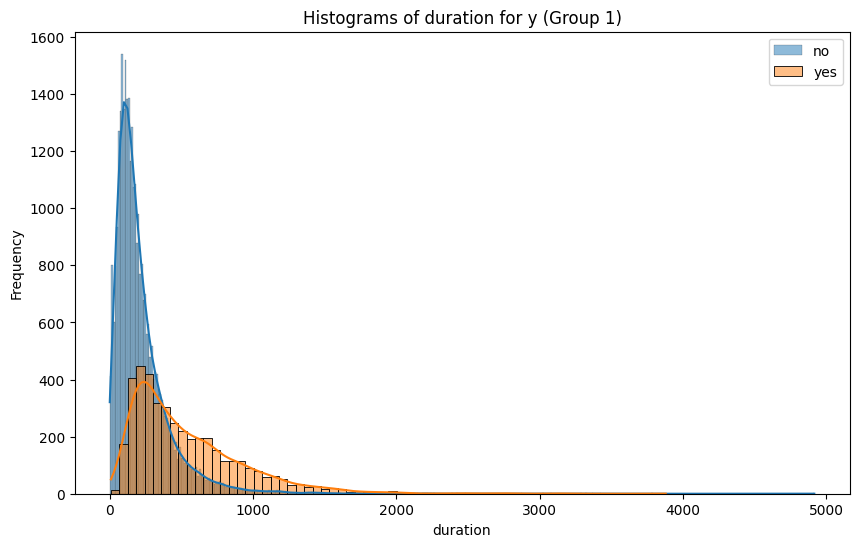

In [18]:
plot_grouped_histograms(train_set, target,"duration", group_size=2)

Vemos como se invierte el yes y el no para duracion mayor de 500. Esta variable sin duda es de mucho peso para el modelo.

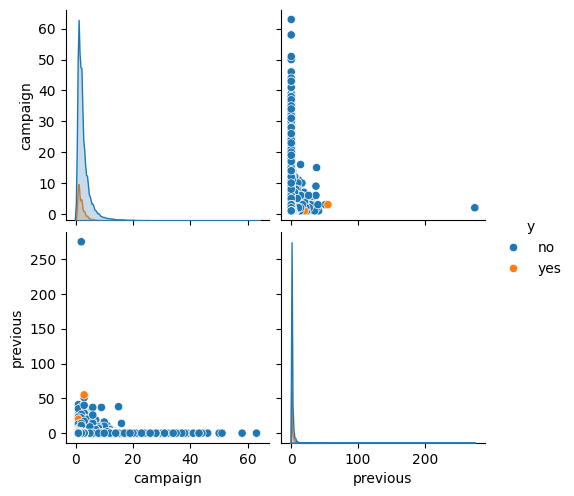

In [19]:
# Visualizamos las ultimas variables 
sns.pairplot(train_set[features_num[4:] + [target]], hue=target);

Me quedo con todas las variables numericas

Ahora hacemos un  analisis bivariante del target con las variables categoricas

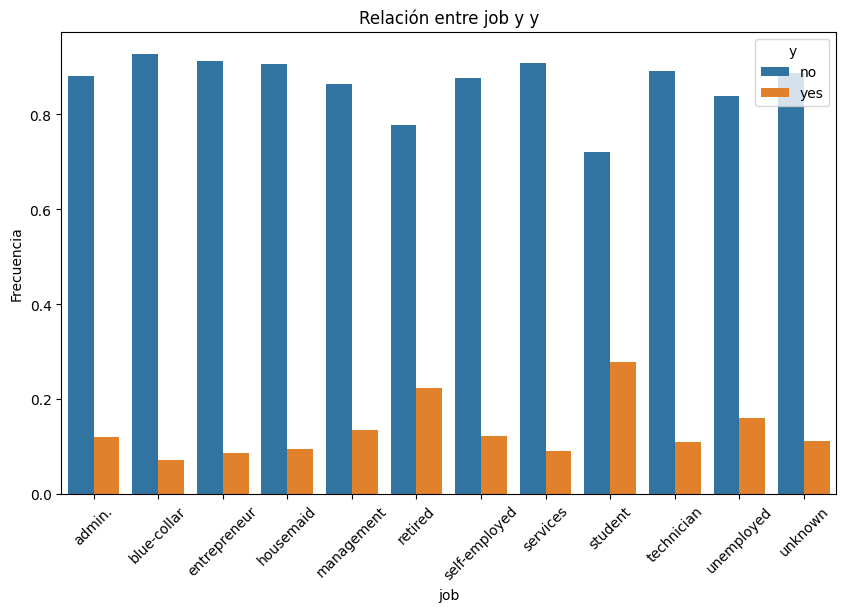

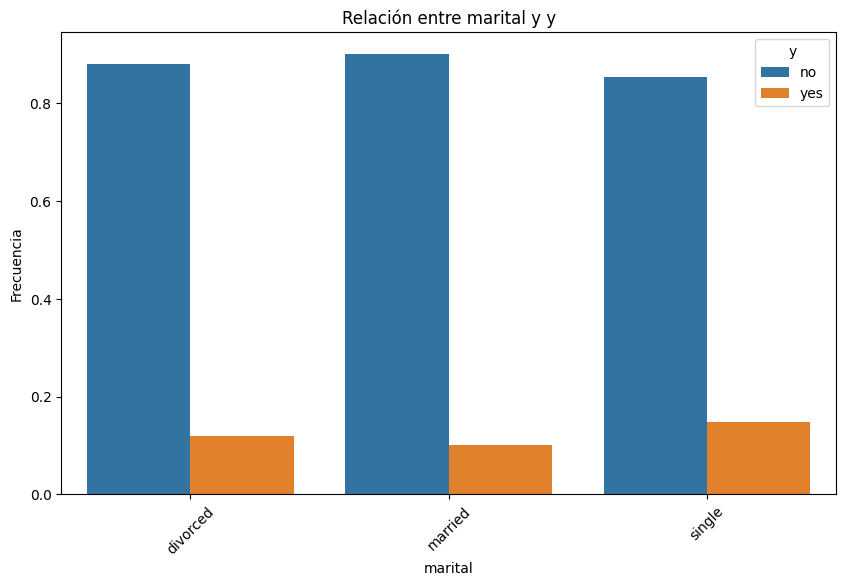

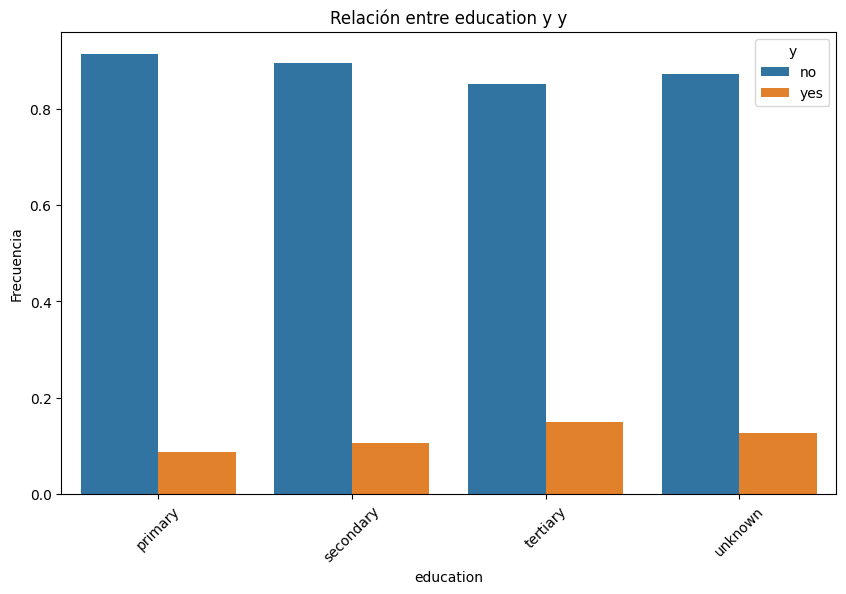

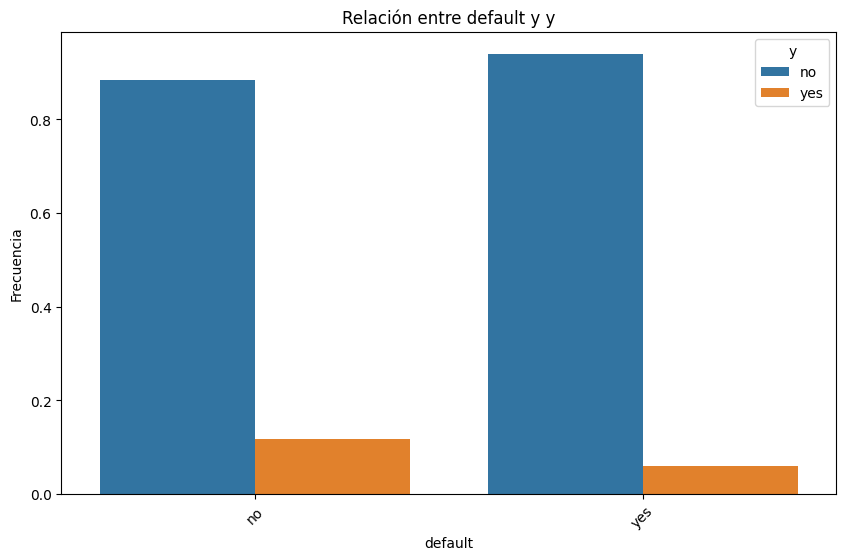

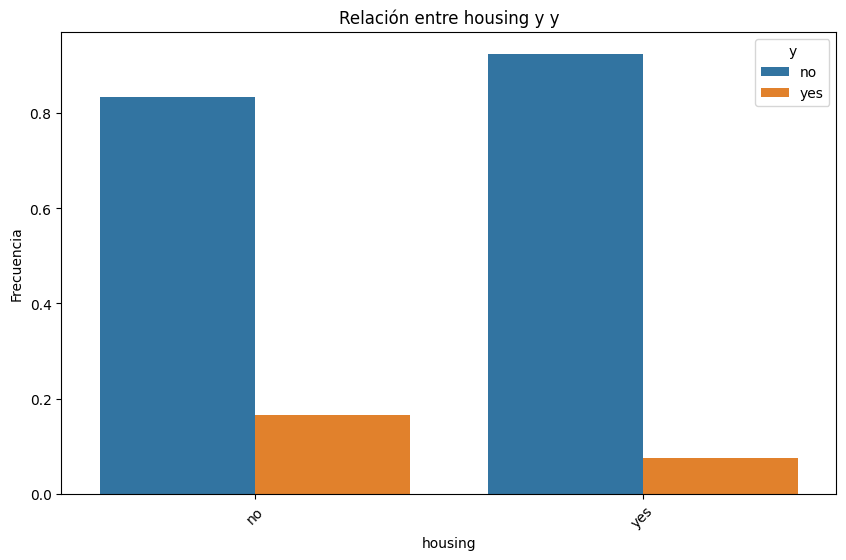

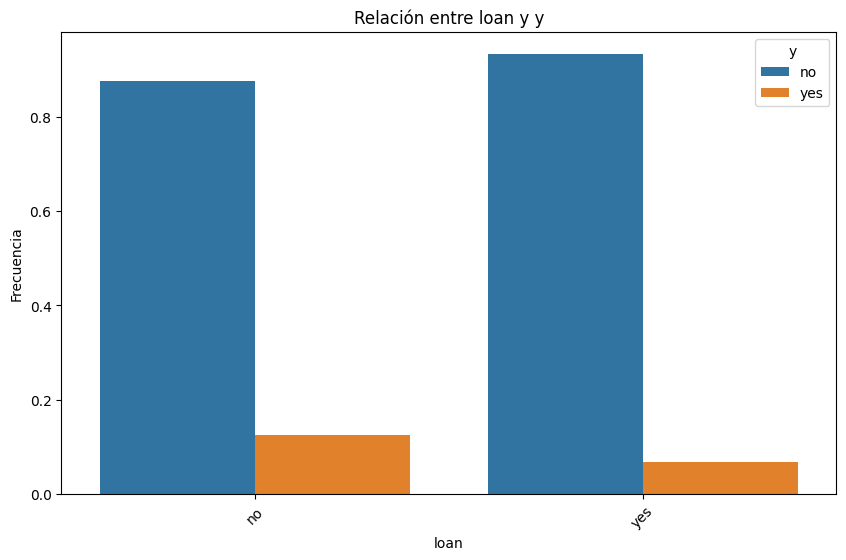

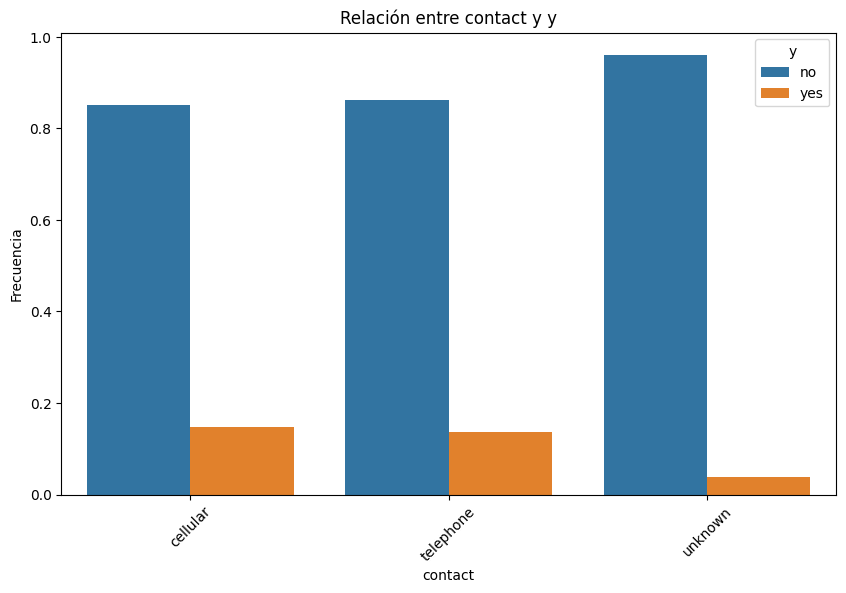

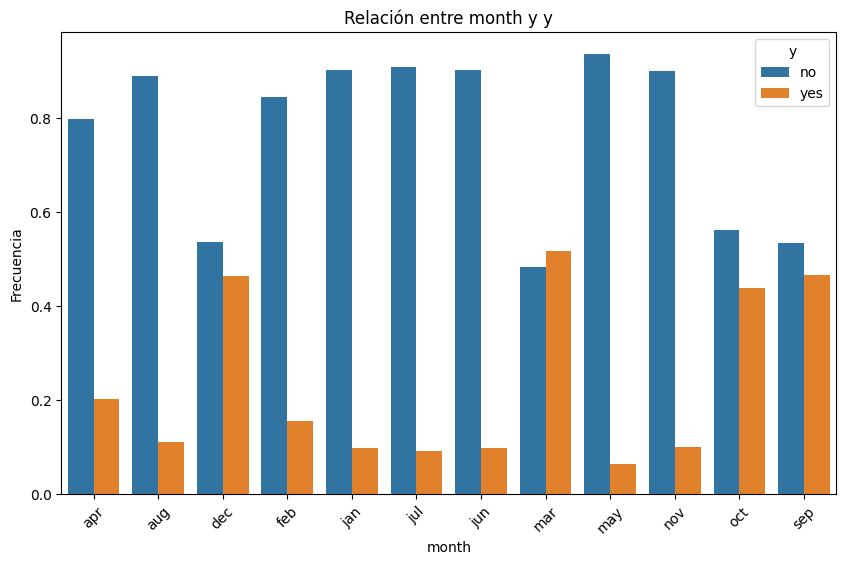

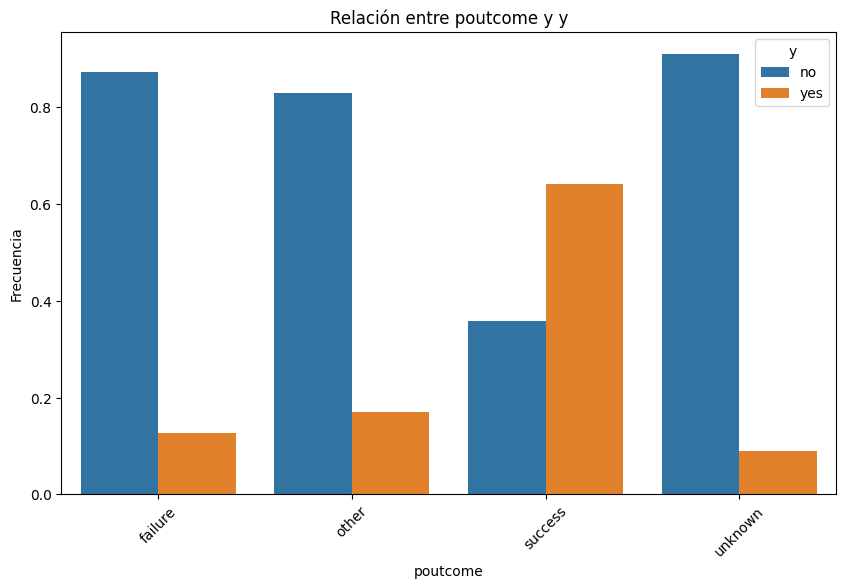

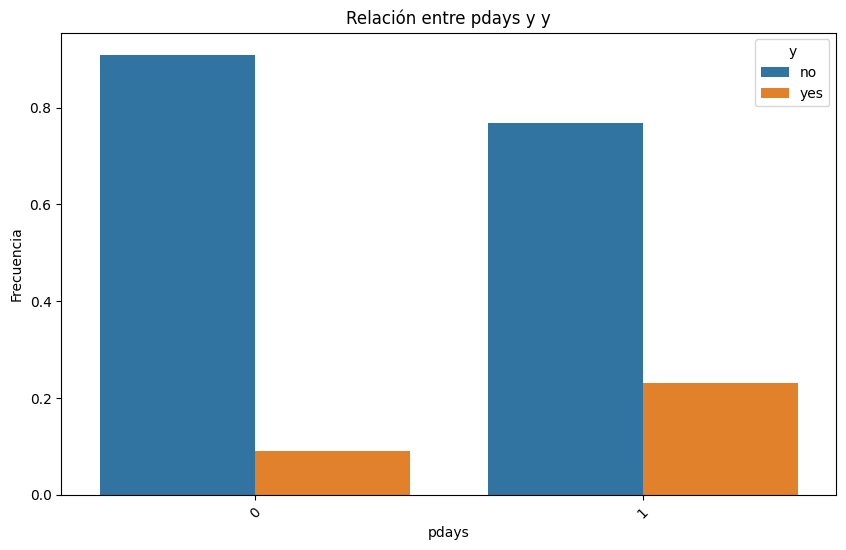

In [20]:
for col in features_cat:
    plot_categorical_relationship_fin(train_set,col,target,size_group=12, relative_freq=True)

Me quedo con todas las categoricas porque las proporciones varian entre una etiqueta y otra. Aunque se nota mas para algunas variables como job, month y poutcome.

**Tratar las features**

Convierto las variables categoricas binarias a numerica (defaulf, housing y loan)

In [21]:
train_set_bck = train_set.copy()
test_set_bck = test_set.copy()

In [22]:
train_set["default"] = train_set.default.str.replace("no","0").replace("yes","1").astype(int)
test_set["default"] = test_set.default.str.replace("no","0").replace("yes","1").astype(int)


In [23]:
train_set["housing"] = train_set.housing.str.replace("no","0").replace("yes","1").astype(int)
test_set["housing"] = test_set.housing.str.replace("no","0").replace("yes","1").astype(int)

In [24]:
train_set["loan"] = train_set.loan.str.replace("no","0").replace("yes","1").astype(int)
test_set["loan"] = test_set.loan.str.replace("no","0").replace("yes","1").astype(int)

In [25]:
features_bin = ["default","housing","loan","pdays"]
features_cat_nobin = [col for col in features_cat if col not in features_bin]

Codifico las variables categoricas con one-hot encoding

In [26]:
cardi = card_tipo(df_mark)
cardi.loc[features_cat_nobin]

,Card,%_Card,Tipo,tipo_sugerido
job,12,0.026542,object,Categorica
marital,3,0.006636,object,Categorica
education,4,0.008847,object,Categorica
contact,3,0.006636,object,Categorica
month,12,0.026542,object,Categorica
poutcome,4,0.008847,object,Categorica


Dividimos el train y el test en X e y

In [27]:
X_train = train_set.drop(target, axis=1)
y_train = train_set[target]

X_test = test_set.drop(target, axis=1)
y_test = test_set[target]

Las categoricas que me quedan no tienenn una cardinalidad tan alta. Así que es factible aplicar get_dummies o un one-hot encoding en lugar de un ordinal encoding.

In [28]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
onehot.fit(X_train[features_cat_nobin])
X_train_enc = onehot.transform(X_train[features_cat_nobin])
X_test_enc = onehot.transform(X_test[features_cat_nobin])

In [29]:
X_train_enc = pd.concat([X_train[features_bin + features_num],X_train_enc],axis=1)
X_test_enc = pd.concat([X_test[features_bin + features_num],X_test_enc],axis=1)

In [30]:
features_cat = [col for col in X_train_enc.columns if col not in features_num]

Ahora transformamos las numericas antes de escalar.  
Transformamos:  
age(no)  
balance(no) No mejora con ninguna transformacion  
day(no)  
duration(si) Aplicamos log (sumando 1 para evitar el 0)  
campaign(si) Le aplicamos logaritmo  + 1  
previous (si) Le aplicamos logaritmo + 1   
  



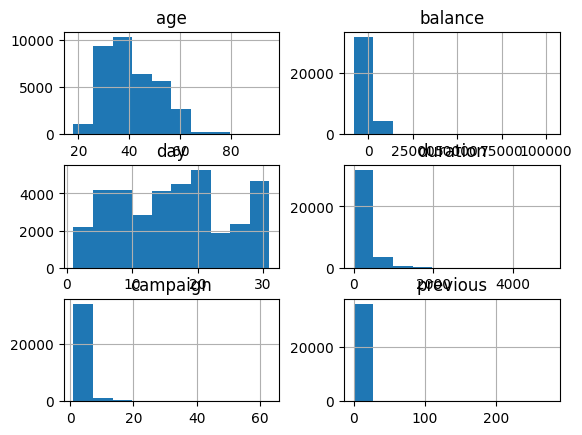

In [31]:
X_train_enc[features_num].hist();

Transformo al logaritmo las columnas duration, campaign y previous

In [32]:
X_train_enc["duration"] = np.log(X_train.duration + 1)
X_train_enc["campaign"] = np.log(X_train.campaign + 1)
X_train_enc["previous"] = np.log(X_train.previous + 1)
X_test_enc["duration"] = np.log(X_test.duration + 1)
X_test_enc["campaign"] = np.log(X_test.campaign + 1)
X_test_enc["previous"] = np.log(X_test.previous + 1)

In [33]:
X_train_trans = X_train_enc.copy()
X_test_trans = X_test_enc.copy()

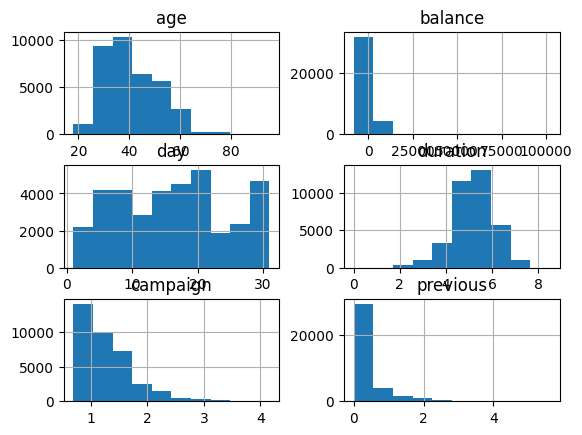

In [34]:
X_train_trans[features_num].hist();

Escalo las variables numericas

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(X_train_trans[features_num]), columns=features_num)

In [36]:
X_train_trans = X_train_trans[features_cat].reset_index(drop=True)
df_scaler = df_scaler.reset_index(drop=True)
X_train_scaled = pd.concat([X_train_trans, df_scaler], axis=1)

In [37]:
df_scaler_test = pd.DataFrame(scaler.transform(X_test_trans[features_num]), columns=features_num)
X_test_trans = X_test_trans[features_cat].reset_index(drop=True)
df_scaler_test = df_scaler_test.reset_index(drop=True)
X_test_scaled = pd.concat([X_test_trans, df_scaler_test], axis=1)

Convierto la variable target a numerica

In [38]:
y_train = y_train.str.replace("no","0").replace("yes","1").astype(int)
y_test = y_test.str.replace("no","0").replace("yes","1").astype(int)

Entreno un modelo de arbol de decision

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

In [40]:
# Establezco los parametros del arbol de decision
tree_param_grid = {
    'max_depth': [None] + list(range(1, 20)),
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [2,4,8]
}

In [41]:
# Aplico un Grid Search al arbol de
from sklearn.model_selection import GridSearchCV

tree_grid_search = GridSearchCV(tree_clf, tree_param_grid, cv=5, scoring='accuracy')
tree_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='accuracy')

Train

In [42]:
# Obtengo el accuracy de train
tree_grid_search.best_score_

np.float64(0.902317022925177)

Test

In [ ]:
# # Obtengo el accuracy de test con el classification report
from sklearn.metrics import classification_report
y_pred = tree_grid_search.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.34      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



Comparamos este resultado con una regresion logistica

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

Train

In [48]:
log_reg.score(X_train_scaled, y_train)

0.903644105286441

Test

In [46]:
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.68      0.36      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



COnclusion y valoracion:  
Tanto el modelo de arbol de decision como el modelo de regresion mostraron reultados casi iguales.  

Como habíamos adelantado al principio. La sensibilidad para la clase 1 es muy baja por la cantidad de falsos negativos ya que el dataset estaba desbalanceado, habiendo menos informacion para aprender a capturar la clase 1.  

La regresion logistica mostró un buen resultado porque antes le aplicamos una transformacion logaritmica y un escalado que le sentaron muy bien.  



Aplicamos la regresion logistica al dataset sin transformar ni escalar y vemos como baja significativamente la accuracy

In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train_enc, y_train)

c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Train

In [53]:
log_reg.score(X_train_enc, y_train)

0.8928334439283344

Test

In [52]:
y_pred = log_reg.predict(X_test_enc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.63      0.26      0.36      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043

